# AND 게이트

## 1) 패키지 참조하기

In [25]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD    # 옵티마이저
from tensorflow.keras.losses import mse        # OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

## 2) 데이터 셋 준비하기
### 랜덤 시드값 고정

In [26]:
np.random.seed(777)

### 데이터 셋 구성

In [27]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [0], [0], [1]])

## 3) 데이터 전처리

- 간단한 데이터 이므로 이 예제에서는 수행하지 않는다.

## 4) 탐색적 데이터 분석

In [28]:
label = train_y.flatten()
df = DataFrame(train_x, label, columns=['x', 'y'])
df

,x,y
0,0,0
0,1,0
0,0,1
1,1,1


## 5) 데이터 셋 분할하기

- 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 진행하지 않음.

## 6) 모델 개발

### 모델 정의

In [29]:
model = Sequential()
model.add(Dense(1, input_shape = (2, ), activation = 'linear'))
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [30]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500


1/1 [==============================] - 0s 298ms/step - loss: 3.1245 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 2.9648 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 2.8150 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 2.6743 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 2.5422 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 2.4183 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 2.3019 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 2.1926 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 2.0899 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 1.9935 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 1.9029 - acc: 0.7

,loss,acc
epochs,,
1,3.124506,0.75
2,2.964835,0.75
3,2.814969,0.75
4,2.674297,0.75
5,2.542241,0.75
...,...,...
496,0.087300,1.00
497,0.087144,1.00
498,0.086989,1.00


## 7) 학습 결과 평가

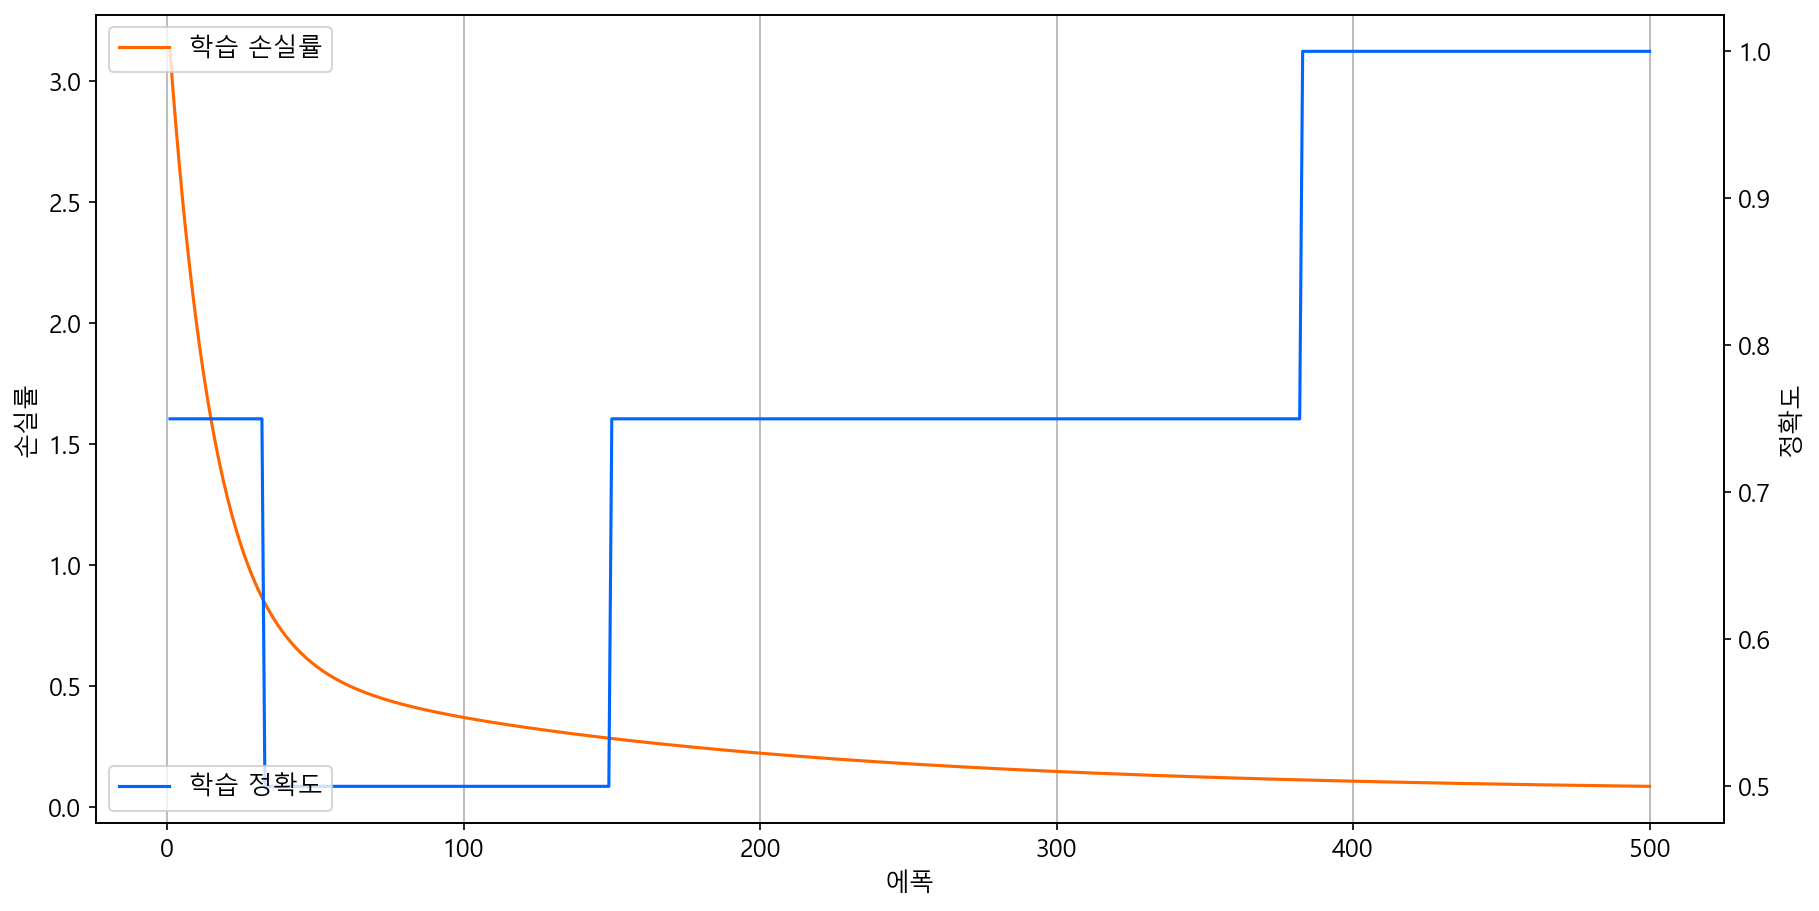

In [31]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(x=result_df.index, y='loss', data=result_df, color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(x=result_df.index, y='acc', data=result_df, color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.savefig("graph2.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()

### 모델 성능 평가

In [32]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0], ev[1]))

1/1 [==============================] - 0s 85ms/step - loss: 0.0865 - acc: 1.0000
손실률: 0.09%, 정확도: 1.00%


### 가중치, 편향 확인

In [33]:
weight, bias = model.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.30502975 0.27215382]
편향: [0.00075974]


## 8) 학습 결과 적용

### 단일 데이터에 대한 예측치 산정

In [34]:
r00 = model.predict([[0, 0]])
r00

1/1 [==============================] - 0s 55ms/step


array([[0.00075974]], dtype=float32)

In [35]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

### OR 연산에 대한 전체 경우의 수 확인해 보기

In [36]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict([[i, j]])
        s = "%s OR %s => %s" % (bool(i), bool(j), bool(round(r[0,0])))
        print(s)

1/1 [==============================] - 0s 73ms/step
False OR False => False
1/1 [==============================] - 0s 35ms/step
False OR True => False
1/1 [==============================] - 0s 34ms/step
True OR False => False
1/1 [==============================] - 0s 35ms/step
True OR True => True
